## SVM applied on classic iris dataset

In [95]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

#load iris dataset

iris = datasets.load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],)

print("Columns: ", df.columns)
print("Shape: ", df.shape)
print("Info: ", df.info())


Columns:  RangeIndex(start=0, stop=5, step=1)
Shape:  (150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
Info:  None


In [96]:
df.describe()

,0,1,2,3,4
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Four features are measured from each sample: the length and the width of the sepals and petals, in centimetres. \
The forth column represents the target class, so the flower type (see below).

In [97]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


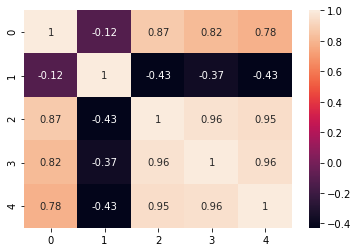

In [98]:
#Correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

So, we have 150 flowers example. \
I am going to assign the length and width of petals to the X features. \
Petal length is almost incorrelated with petal width. This is good. \
Th sepal length and width are not used as they are very correlated between them (0.95, 0.95) and also with petal length (0.87, 0.82).

In [99]:
x = iris.data[:, [2,3]] #petal length and petal width
y = iris.target #target variable

print("X: ", x[:5])
print("Y: ", y[:5])
print("Class labels: ", np.unique(y))
print("Class labels: ", iris.target_names)

X:  [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
Y:  [0 0 0 0 0]
Class labels:  [0 1 2]
Class labels:  ['setosa' 'versicolor' 'virginica']


{0, 1, 2} = {setosa, versicolor, virginica}

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y) 
#Stratify parameter makes sure that the class labels are distributed in the train and test datasets as they are in the original dataset
#for example, if the original dataset has 30% of class 0, the train and test datasets will also have 30% of class 0

print("Labels counts in y: ", np.bincount(y))
print("Percentage of class 0: ", np.bincount(y)[0]/len(y))
print("Labels counts in y_train: ", np.bincount(y_train))
print("Percentage of class 0 in y_train: ", np.bincount(y_train)[0]/len(y_train))
print("Labels counts in y_test: ", np.bincount(y_test))
print("Percentage of class 0 in y_test: ", np.bincount(y_test)[0]/len(y_test))


Labels counts in y:  [50 50 50]
Percentage of class 0:  0.3333333333333333
Labels counts in y_train:  [35 35 35]
Percentage of class 0 in y_train:  0.3333333333333333
Labels counts in y_test:  [15 15 15]
Percentage of class 0 in y_test:  0.3333333333333333


In [101]:
#Normalize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


In [102]:
print("X_train_std: ", x_train_std[:5])
print("X_test_std: ", x_test_std[:5])

X_train_std:  [[-1.33269725 -1.30728421]
 [-1.16537974 -1.30728421]
 [ 0.84243039  1.44587881]
 [ 1.0655204   1.18367281]
 [-1.44424226 -1.30728421]]
X_test_std:  [[ 0.89820289  1.44587881]
 [-1.16537974 -1.04507821]
 [-1.33269725 -1.17618121]
 [ 0.39625036  0.65926081]
 [ 0.34047786  0.2659518 ]]


## SVM Implementation (linear kernel)

In [103]:
from sklearn.svm import SVC
#SVC is the support vector classifier
#C is the regularization parameter
#kernel is the kernel type

svm = SVC(kernel='linear', C=1.0, random_state=42)

#Fit the model
svm.fit(x_train_std, y_train)

#Predict the class labels
y_pred = svm.predict(x_test_std)

print("Misclassified samples: %d" % (y_test != y_pred).sum())

Misclassified samples: 1


In [104]:
#Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [105]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


Just 1 falsely assigned sample

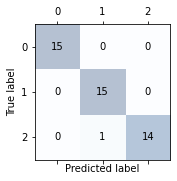

In [106]:
#Represent the confusion matrix as a heatmap

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [107]:
#Report the precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<ipython-input-108-843ec6990677>:27: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')


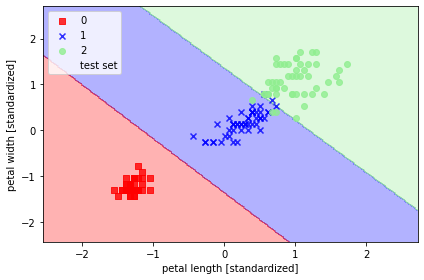

In [108]:
#PLot the SVM decision regions

from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], y=x[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)
        
    if test_idx:
        x_test, y_test = x[test_idx, :], y[test_idx]
        plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

x_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(x=x_combined_std, y=y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')

plt.legend(loc='upper left')

plt.tight_layout()

plt.show()
